In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [2]:
words = ["Gazelle", "Flamingo", "Caribou", "Lion", "Whale", "Mongoose", "Anteater", "Hawk", "Tortoise", "Fox", "Pigeon", "Hedgehog", "Panda", "Newt", "Dragonfly"]
f0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,])
w0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,])

f_list = [f0]
w_list = [w0]
activity_profile_map = {}
beta = 0.8

def rho():
    i = len(f_list)
    return math.sqrt(1 + beta**2 * ((f_list[i-1].dot(w_list[i]))**2 - 1)) - beta*(f_list[i-1].dot(w_list[i]))

def present(word):
    w = np.array([0] * len(words))
    w[words.index(word)] = 1
    w_list.append(w)
    f = f_list[len(f_list) - 1] * rho() + beta * w
    activity_profile_map[word] = f
    f_list.append(f)

def present_words(words):
    for i in range(len(words)):
        present(words[i])
        
def lag(w1, w2):
    index1 = words.index(w1)
    index2 = words.index(w2)
    return index2 - index1

def similarity(f1, f2):
    return f1.dot(f2)
    
def recall(word):
    w = activity_profile_map[word]
    w_list.append(w)
    f = f_list[len(f_list) - 1] * rho() + beta * w
    f_list.append(f)
    
    i = words.index(word)
    lag_indices = range(i-2, i+3)
    lag_similarities = []
    
    for lag_index in lag_indices:
        if 0 <= lag_index < len(words):
            lag_words = lag(word, words[lag_index])
            similarity_words = similarity(f, activity_profile_map[words[lag_index]])
            lag_similarities.append((lag_words, similarity_words))
            lag_list, similarities_list = map(list, zip(*lag_similarities))
            
    return (f, lag_list, similarities_list)
        
def recall_words(words):
    for i in range(len(words)):
        f, lag_list, similarities_list = recall(words[i]) 
        plt.plot(lag_list, similarities_list)

In [3]:
present_words(words)

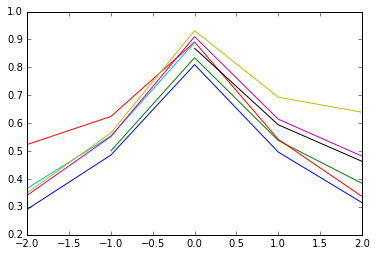

In [4]:
# Randomly recall words: no recency effect dur
recall_words(np.random.choice(words, 7))